In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

In [3]:
data = pd.read_csv('./data_files/clean_data.csv')

In [4]:
data.drop(columns=['Unnamed: 0'], inplace=True)
data

,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,last_owned
0,SOLD,105000,3.0,2.0,0.12,Sector Yahuecas Titulo # V84,Adjuntas,Puerto Rico,601.0,920.0,Not Owned
1,SOLD,80000,4.0,2.0,0.08,Km 78 9 Carr # 135,Adjuntas,Puerto Rico,601.0,1527.0,Not Owned
2,SOLD,67000,2.0,1.0,0.15,556G 556-G 16 St,Juana Diaz,Puerto Rico,795.0,748.0,Not Owned
3,SOLD,145000,4.0,2.0,0.10,R5 Comunidad El Paraso Calle De Oro R-5 Ponce,Ponce,Puerto Rico,731.0,1800.0,Not Owned
4,SOLD,65000,6.0,2.0,0.05,14 Navarro,Mayaguez,Puerto Rico,680.0,1000.0,Not Owned
...,...,...,...,...,...,...,...,...,...,...,...
14714,SOLD,735000,3.0,2.0,0.90,17 Sunset Rd,Bristol,Rhode Island,2809.0,1727.0,6/29/1999
14715,SOLD,785000,4.0,3.0,0.24,7 Agawam Rd,Barrington,Rhode Island,2806.0,2166.0,9/23/2021
14716,SOLD,639900,2.0,2.0,0.09,15 Morgan Dr Unit 109,Natick,Massachusetts,1760.0,1705.0,Not Owned
14717,SOLD,465000,3.0,2.0,0.36,16 Park Ave,Framingham,Massachusetts,1701.0,1442.0,Not Owned


In [5]:
data['state'].unique()

array(['Puerto Rico', 'Virgin Islands', 'Massachusetts', 'Connecticut',
       'New Hampshire', 'Vermont', 'New Jersey', 'New York',
       'South Carolina', 'Tennessee', 'Rhode Island', 'Virginia'],
      dtype=object)

Since houses that are 1 million + are very rare and act as outliers within the data im only tracking the house that are less than or = to 1 million. In doing so will make the avg prices closer together.

In [6]:
states_price = data[data['price'] <= 1000000]

In [7]:
states_price = states_price.groupby('state')['price'].mean().reset_index()

In [8]:
states_price

,state,price
0,Connecticut,310949.107948
1,Massachusetts,367505.547148
2,New Hampshire,389804.300712
3,New Jersey,333490.000000
4,New York,309653.923538
5,Puerto Rico,232605.518390
6,Rhode Island,388561.113508
7,South Carolina,18950.000000
8,Tennessee,34900.000000
9,Vermont,239858.438356


c:\Users\sreno\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


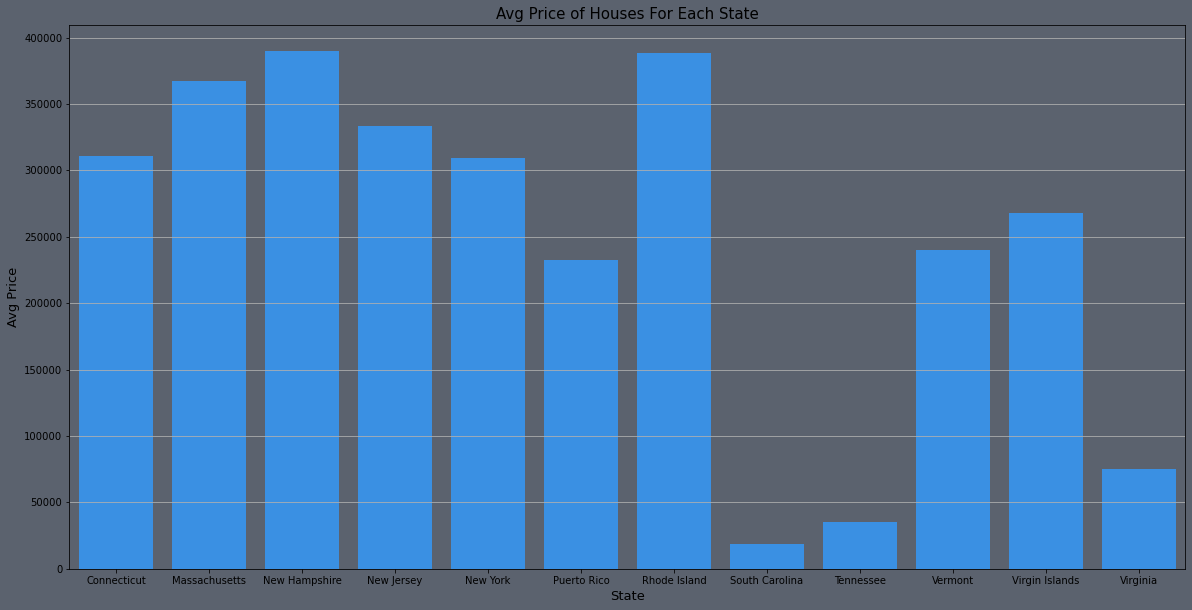

In [9]:
fig = plt.figure(figsize=(20,10))

ax = plt.axes()

fig.set_facecolor('#5b626e')
ax.set_facecolor('#5b626e')

sns.barplot(states_price['state'], states_price['price'], color='dodgerblue')
plt.title("Avg Price of Houses For Each State", fontsize=15)
plt.ylabel("Avg Price", fontsize=13)
plt.xlabel("State", fontsize=13)
plt.grid(axis='y')


In [10]:
data

,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,last_owned
0,SOLD,105000,3.0,2.0,0.12,Sector Yahuecas Titulo # V84,Adjuntas,Puerto Rico,601.0,920.0,Not Owned
1,SOLD,80000,4.0,2.0,0.08,Km 78 9 Carr # 135,Adjuntas,Puerto Rico,601.0,1527.0,Not Owned
2,SOLD,67000,2.0,1.0,0.15,556G 556-G 16 St,Juana Diaz,Puerto Rico,795.0,748.0,Not Owned
3,SOLD,145000,4.0,2.0,0.10,R5 Comunidad El Paraso Calle De Oro R-5 Ponce,Ponce,Puerto Rico,731.0,1800.0,Not Owned
4,SOLD,65000,6.0,2.0,0.05,14 Navarro,Mayaguez,Puerto Rico,680.0,1000.0,Not Owned
...,...,...,...,...,...,...,...,...,...,...,...
14714,SOLD,735000,3.0,2.0,0.90,17 Sunset Rd,Bristol,Rhode Island,2809.0,1727.0,6/29/1999
14715,SOLD,785000,4.0,3.0,0.24,7 Agawam Rd,Barrington,Rhode Island,2806.0,2166.0,9/23/2021
14716,SOLD,639900,2.0,2.0,0.09,15 Morgan Dr Unit 109,Natick,Massachusetts,1760.0,1705.0,Not Owned
14717,SOLD,465000,3.0,2.0,0.36,16 Park Ave,Framingham,Massachusetts,1701.0,1442.0,Not Owned


In [11]:
new_ham = data[data['state'] == 'New Hampshire']

In [12]:
new_ham = new_ham.groupby('city').mean().applymap('{:.1f}'.format).reset_index()

In [13]:
new_ham['price']= new_ham['price'].astype(float)

In [14]:
new_ham = new_ham.sort_values(by='price', ascending= False)

c:\Users\sreno\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


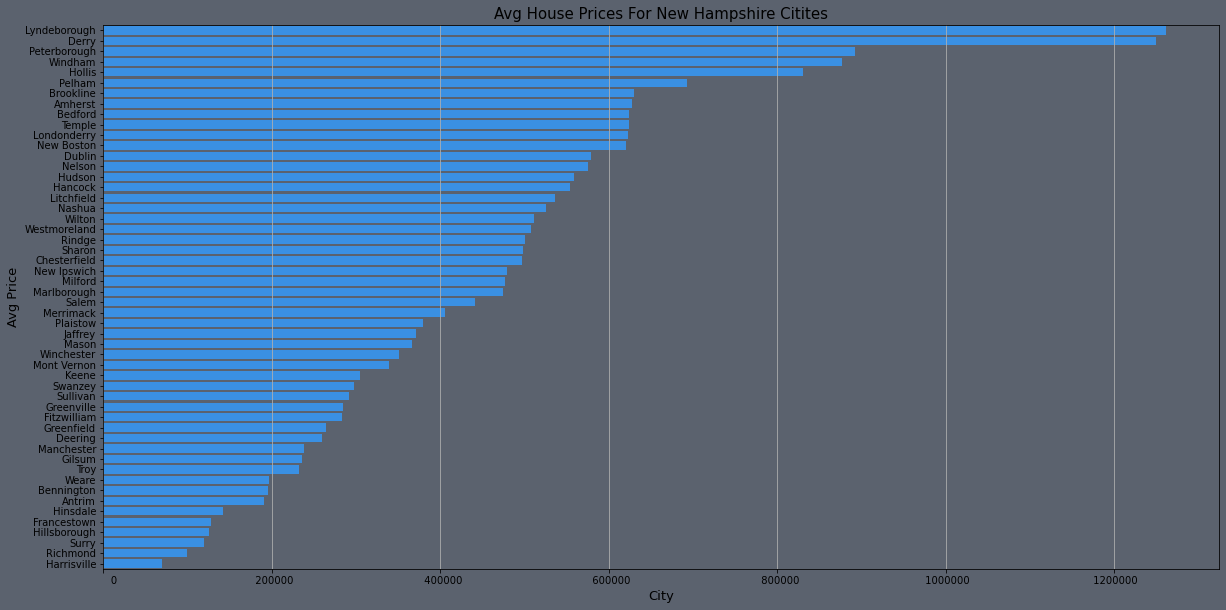

In [15]:
fig = plt.figure(figsize=(20,10))

ax = plt.axes()

fig.set_facecolor('#5b626e')
ax.set_facecolor('#5b626e')

sns.barplot( new_ham['price'], new_ham['city'], color='dodgerblue')
plt.title("Avg House Prices For New Hampshire Citites", fontsize=15)
plt.ylabel("Avg Price", fontsize=13)
plt.xlabel("City", fontsize=13)
ax.xaxis.set_major_formatter(FormatStrFormatter("% 8.0f"))
#ax.xaxis.set_ticks(np.arange(0, 1300000, 100000))

plt.grid(axis='x')


In [16]:
data

,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,last_owned
0,SOLD,105000,3.0,2.0,0.12,Sector Yahuecas Titulo # V84,Adjuntas,Puerto Rico,601.0,920.0,Not Owned
1,SOLD,80000,4.0,2.0,0.08,Km 78 9 Carr # 135,Adjuntas,Puerto Rico,601.0,1527.0,Not Owned
2,SOLD,67000,2.0,1.0,0.15,556G 556-G 16 St,Juana Diaz,Puerto Rico,795.0,748.0,Not Owned
3,SOLD,145000,4.0,2.0,0.10,R5 Comunidad El Paraso Calle De Oro R-5 Ponce,Ponce,Puerto Rico,731.0,1800.0,Not Owned
4,SOLD,65000,6.0,2.0,0.05,14 Navarro,Mayaguez,Puerto Rico,680.0,1000.0,Not Owned
...,...,...,...,...,...,...,...,...,...,...,...
14714,SOLD,735000,3.0,2.0,0.90,17 Sunset Rd,Bristol,Rhode Island,2809.0,1727.0,6/29/1999
14715,SOLD,785000,4.0,3.0,0.24,7 Agawam Rd,Barrington,Rhode Island,2806.0,2166.0,9/23/2021
14716,SOLD,639900,2.0,2.0,0.09,15 Morgan Dr Unit 109,Natick,Massachusetts,1760.0,1705.0,Not Owned
14717,SOLD,465000,3.0,2.0,0.36,16 Park Ave,Framingham,Massachusetts,1701.0,1442.0,Not Owned


In [47]:
under_mil = data[data['price'] <= 1000000]

c:\Users\sreno\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


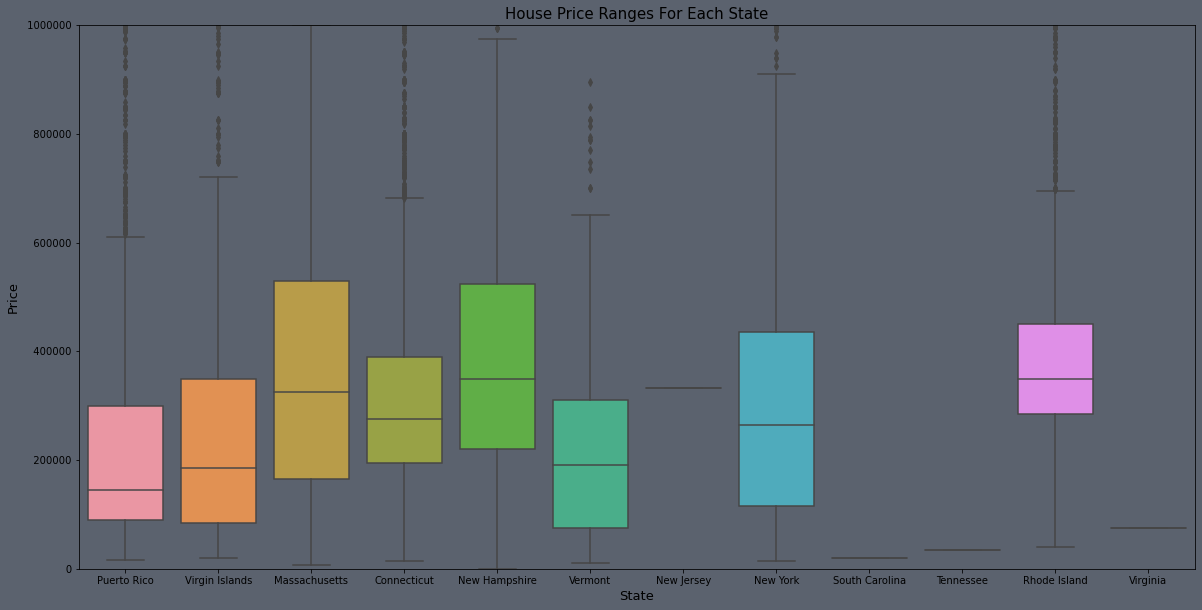

 This can really help us understand where the significant amount of house prices are for each state. For example you 
are more likely to get a cheaper house in Puerto Rico and Vermont compared to road island New Hampshire ect. We can also see which
states have less houses on the market and which have more. New Jersey, South Carolina, Tennessee, and Virginia All have very little
amout of houses on the market that they dont have as large of a Interquartile range as the other states.



In [52]:
fig = plt.figure(figsize=(20,10))
ax  = plt.axes()
fig.set_facecolor('#5b626e')
ax.set_facecolor('#5b626e')
sns.boxplot(under_mil['state'], under_mil['price'])
plt.ylim(0,1000000)
ax.yaxis.set_major_formatter(FormatStrFormatter("% 8.0f"))
plt.title('House Price Ranges For Each State', fontsize=15)
plt.ylabel('Price', fontsize=13)
plt.xlabel('State', fontsize=13)
plt.show()
print(""" This can really help us understand where the significant amount of house prices are for each state. For example you 
are more likely to get a cheaper house in Puerto Rico and Vermont compared to road island New Hampshire ect. We can also see which
states have less houses on the market and which have more. New Jersey, South Carolina, Tennessee, and Virginia All have very little
amout of houses on the market that they dont have as large of a Interquartile range as the other states.
""")